<a href="https://colab.research.google.com/github/ambolt314/covid-decision-tree/blob/main/covid_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import files
uploaded = files.upload()

Saving SID_1934573_raw data.csv to SID_1934573_raw data.csv


In [43]:
import pandas as pd
raw_covid_data = pd.read_csv("/content/SID_1934573_raw data.csv")
headers = list(raw_covid_data.columns)
print(raw_covid_data)


    subject_id  fever  cough  ...  chills  loss_of_smell_or_taste  covid_19_result
0            1   True   True  ...   False                    True         POSITIVE
1            2  False  False  ...   False                   False         NEGATIVE
2            3  False  False  ...   False                   False         POSITIVE
3            4  False   True  ...   False                   False         POSITIVE
4            5  False  False  ...   False                   False         POSITIVE
..         ...    ...    ...  ...     ...                     ...              ...
95          96  False  False  ...   False                   False         NEGATIVE
96          97  False  False  ...   False                   False         NEGATIVE
97          98  False  False  ...   False                    True         NEGATIVE
98          99  False  False  ...   False                   False         NEGATIVE
99         100  False  False  ...   False                   False         NEGATIVE

[10

In [46]:
import numpy as np
import pydotplus

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image


def generate_tree(data):

  X = raw_covid_data[headers[1:-1]]
  y = raw_covid_data.covid_19_result
  
  # implement train-test-split
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=1
      )
  

  # generate decision tree
  clf = tree.DecisionTreeClassifier()
  clf.fit(X_train, y_train)
  tree.plot_tree(clf)

  dot_data=StringIO()
  export_graphviz(clf, 
                  out_file=dot_data, 
                  filled=True, 
                  rounded=True, 
                  special_characters=True, 
                  feature_names=headers[1:-1], 
                  class_names=['POSITIVE', 'NEGATIVE']
                  )
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('covid_19_results.png')
  Image(graph.create_png())

    


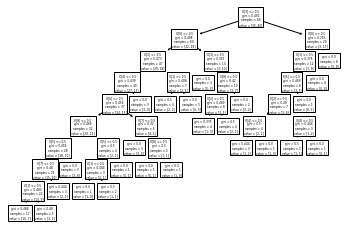

In [47]:
generate_tree(raw_covid_data)